**Titanic: Machine Learning from Disaster**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

We will focus on the analysis of what sorts of people were likely to survive, think about what columns might be related, what might contribute to what, what might dependent or independent etc.

**Detaset Desccription**
This data set consists of information about the passengers of the RMS Titanic ship And also have info about is that particular passenger has survived that disaster or not. For every individual person, we have information about —

* **Passenger Id**- Id number of passengers in the data set

* **Name**- Name of the passenger

* **Survival**- Person survived or not ( 0 for No & 1 for Yes)

* **P-class**- With what class of ticket that passenger was traveling.

* **sex**- Male Or Female

* **Age**- Age of the person in Years

* **Sibsp**- Number of siblings/spouses on the Titanic

* **parch**- Number of parents/children on the Titanic

* **Ticket**- Ticket number

* **Fare**- Amount of money that person paid to travel

* **Cabin**- Cabin Number of Passenger

* Embarked- Port of Embarkation ( C = Cherbourg, Q = Queenstown, S = Southampton)

In [20]:
titanic = 'titanic.csv'

In [21]:
# So firstly we need to import the libraries required to go further..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let’s load the data in a data frame and check how data looks like..

df = pd.read_csv(titanic)


Asling the right questions:

Some list of questions:

* What is the demographic breakdown of passengers?
* What was the overall survival rate of passengers on the Titanic?
* Did age have an impact on survival rates?
* Were passengers in higher classes more likely to survive?
* What was the distribution of fares paid by passengers?
* Were families more likely to survive together?
* Did the point of embarkation impact survival rates?
* How did gender influence survival rates?
* Were there any patterns in passenger names or titles that might be interesting?
* What is the correlation between various features (e.g., age, fare, class)?
* What was the distribution of fares paid by passengers?
* What was the survival rate of different passenger classes broken down by gender?

More refined questions:

* Do first-class passengers have a higher survival rate compared to third-class passengers?"
* Is there a significant difference in survival rates between males and females?"
* How does age impact the likelihood of survival?
* Are passengers who embarked from different ports more likely to survive?




**An EDA checklist**
If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset.

An EDA checklist
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

# A Starting Point


**Data exploration is the process of understanding your data.**

Key steps include:

Checking data types

Identifying missing values

Calculating basic statistics (mean, median, standard deviation)

more.....

In [22]:
# before diving into analysis, it's crucial to understand your data; especially when you have limited prior knowledge about its contents.

# Look at our data frame
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


But think about more preliminary think to do before starting the complicated analysis

# Getting Insights About The Dataset

In [23]:
# How many number of rows and columns in the DataFrame.
df.shape

(891, 12)

In [24]:
# List all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
# No. of unique elements in our dataset
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [26]:
# Check the data types of each column
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [27]:
#Let’s change the type of Passenger Id, Survived and Pclass to string.

vars = ['PassengerId', 'Survived', 'Pclass']
for i in vars:
  df[i] = df[i].astype(str)

df.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Basic Data Manipulation

Basic data manipulations refer to fundamental operations and transformations applied to a dataset to prepare it for analysis or to derive insights from it.

Example:

* Some data might be in formats that are hard to work with.
* Feel free to add  your own columns:
“date” might become “date_in_days_since_zero”
* Survey results, such as “strong agree”, “agree”, “neutral”, “disagree”, “strong disagree”, might become 2, 1, 0, -1, -2
* Simply use the apply function. Similarly, feel free to change units:
* * Days can become seconds
* * Pounds can become grams
etc.


EXAMPLE: Extracting Titles from the "Name" Column:

You can extract titles (e.g., "Mr.," "Mrs.," "Miss") from the "Name" column using regular expressions.

In [37]:
import re

# Extract titles from the 'Name' column and create a new 'Title' column
df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
df.head(10)

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\henry\AppData\Local\Temp\ipykernel_6220\3356245878.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


# Learning About Individual Columns


We can use the describe method to generate summary statistics for individual columns in the Titanic dataset as part of our exploratory data analysis (EDA).

Any missing value or NaN value is automatically skipped. describe() function gives a good picture of the distribution of data.

In [44]:
# df.describe()

# Generate summary statistics for the "Survived" column

# df["Survived"].describe()


# Generate summary statistics for the "Age" column
# df['Age'].describe()

In the dataset, there’re 891 passengers, and the average survival rate is 38%. Age ranges from 0.42 to 80 and the average is ~30 year old. At least 50% of passengers don’t have siblings / spouses aboard the Titanic, and at least 75% of passengers don’t have parents / children aboard the Titanic. The fare varies a lot.

Additionally, we can create box and whisker plots to visualize the distribution of numeric columns.

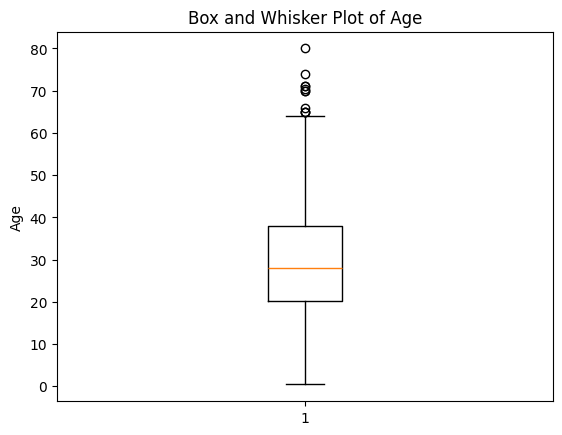

In [45]:
# Create a boxplot for the "Age" column
fig, ax = plt.subplots()
ax.boxplot(df['Age'].dropna())  # Dropna to handle missing values if any
ax.set_title('Box and Whisker Plot of Age')
ax.set_ylabel('Age')

#allow to visualize the central tendency (median), spread (IQR - the interquartile range), and any potential outliers in the data.
plt.show()

# DISTRIBUTIONS

Next, you might want to know about how variables are distributed.

**Example: Examining the Distribution of Categorical Variables (e.g., "Embarked"):**

For categorical variables like "Embarked," you can use the value_counts() method to count the occurrences of each category. This allows you to understand how passengers are distributed among the different embarkation points (process of loading passengers).

In [46]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

This output shows that the majority of passengers (644) embarked from "S" (Southampton), followed by "C" (Cherbourg) with 168 passengers and "Q" (Queenstown) with 77 passengers. This information provides insights into how passengers are distributed among different embarkation points.

**Example: Examining the Distribution of the "Age" Continuous Variable**

<Axes: ylabel='Frequency'>

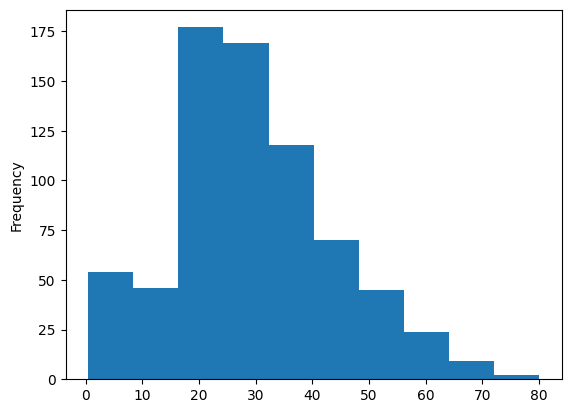

In [47]:
df.Age.plot.hist()

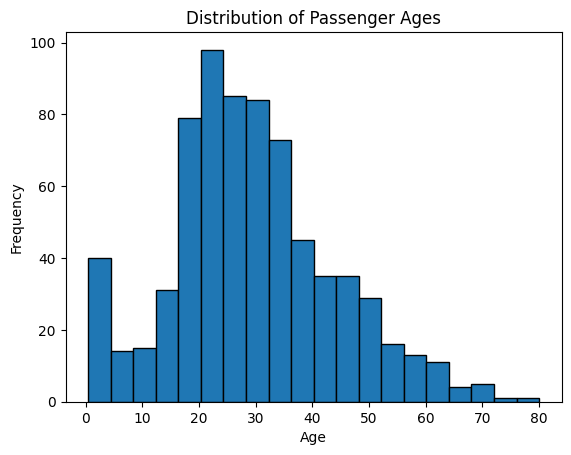

In [54]:
# Create a histogram of passenger ages
plt.hist(df['Age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passenger Ages')
#shows how ages are distributed among passengers: see shape of the distribution, the central tendency (peaks), and the spread of ages.
plt.show()


# plt.hist(df['Fare'], bins=20, edgecolor='k')
# plt.xlabel('Fare')
# plt.ylabel('Frequency')
# plt.title('Distribution of Passenger Fares')
# plt.show()

# Variable Relationships

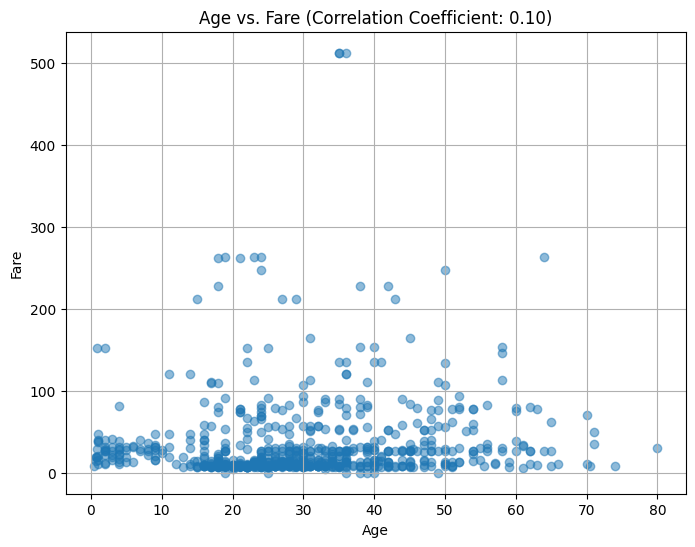

Pearson Correlation Coefficient (r): 0.09606669176903888


In [56]:
#calculate the Pearson correlation coefficient (r) between two variables, such as "Age" and "Fare," and visualize their relationship.


# Calculate the Pearson correlation coefficient (r) between "Age" and "Fare"
correlation_coefficient = df['Age'].corr(df['Fare'])

# Create a scatter plot to visualize the relationship between "Age" and "Fare"
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title(f'Age vs. Fare (Correlation Coefficient: {correlation_coefficient:.2f})')
plt.grid(True)
plt.show()

print("Pearson Correlation Coefficient (r):" , correlation_coefficient)

In practical terms, the correlation of 0.0961 suggests that there is not a strong linear relationship (very weak positive linear correlation) between age and fare for the Titanic passengers. there is a slight tendency that as passenger age increases, their fare may also increase slightly, but the relationship is not very strong. The positive sign of the correlation coefficient indicates that, on average, as one variable (age) goes up, the other variable (fare) also tends to go up, but the correlation is weak, as the value is close to zero.



Other factors likely have a more significant influence on passenger fares.







In [58]:
# For exploring relationships between variables to uncover insights. We can use techniques like correlation analysis or cross-tabulation for this purpose.

# Correlation analysis
correlation = df[['Age', 'Fare']].corr()
print(correlation)

# Cross-tabulation: how categorical variables are related and distributed.
# shows the count of passengers in each combination of passenger class and survival status.
cross_tab = pd.crosstab(df['Pclass'], df['Survived'])
print(cross_tab)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


For each passenger class (1st, 2nd, and 3rd), the table shows the number of passengers who did not survive (0) and those who survived (1).

For example, in the first row (Pclass 1), 80 passengers did not survive, and 136 passengers survived.

Cross-tabulation tables like this are useful for understanding how categorical variables are distributed and how they relate to each other


# Information about the dataset

In [36]:
df.info()

# We observe that there are missing values at the Age, Cabin and Embarked columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 90.6+ KB
